In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
reactions = pd.read_csv('cleaned_Reactions.csv')
contents = pd.read_csv('cleaned_Content.csv')
reactiontypes = pd.read_csv('cleaned_ReactionTypes.csv')

In [4]:
reactions.head()

,Unnamed: 0,Content ID,RType,Datetime
0,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
1,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
2,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
3,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01
4,5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58


In [5]:
contents.head()

,Unnamed: 0,Content ID,Type,Category
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,4,01ab84dd-6364-4236-abbb-3f237db77180,video,food


In [6]:
reactiontypes.head()

,Unnamed: 0,RType,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30


In [7]:
merged_df = pd.merge(reactions[['Content ID', 'RType', 'Datetime']], contents[['Content ID', 'Type', 'Category']], on='Content ID')

In [8]:
merged_df.head()

,Content ID,RType,Datetime,Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,Studying
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,photo,Studying
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,photo,Studying
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,Studying
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,photo,Studying


In [9]:
final_df = pd.merge(merged_df[['Content ID', 'RType', 'Datetime', 'Type', 'Category']], reactiontypes[['RType', 'Sentiment', 'Score']], on='RType')

In [10]:
final_df.head()

,Content ID,RType,Datetime,Type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,Studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,Studying,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-04-09 02:46:20,photo,Studying,negative,0
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,disgust,2021-03-28 21:15:26,photo,healthy eating,negative,0
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,disgust,2020-08-04 05:40:33,photo,healthy eating,negative,0


In [11]:
final_df['Category'] = final_df['Category'].str.lower()

In [12]:
total_score_per_category = final_df.groupby('Category')['Score'].sum().reset_index()
print(total_score_per_category)

           Category  Score
0           animals  74965
1           cooking  64756
2           culture  66579
3              dogs  52511
4         education  57436
5           fitness  55323
6              food  66676
7    healthy eating  69339
8   public speaking  49264
9           science  71168
10           soccer  57783
11         studying  54269
12       technology  68738
13           tennis  50339
14           travel  64880
15         veganism  49619


In [13]:
sorted_score = total_score_per_category.sort_values(by='Score', ascending= False)
print("Total scores of each category in descending order \n",sorted_score)

Total scores of each category in descending order 
            Category  Score
0           animals  74965
9           science  71168
7    healthy eating  69339
12       technology  68738
6              food  66676
2           culture  66579
14           travel  64880
1           cooking  64756
10           soccer  57783
4         education  57436
5           fitness  55323
11         studying  54269
3              dogs  52511
13           tennis  50339
15         veganism  49619
8   public speaking  49264


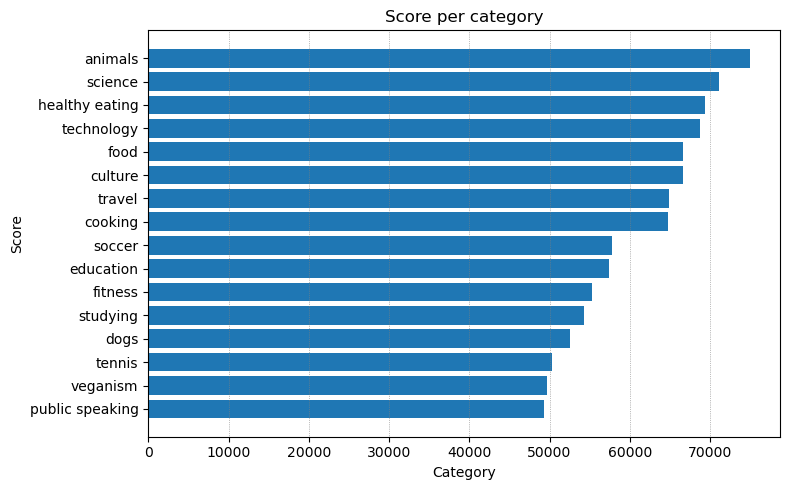

In [14]:
plt.figure(figsize=(8,5))
plt.barh(sorted_score['Category'], sorted_score['Score'])
plt.xlabel('Category')
plt.ylabel('Score')
plt.title('Score per category')
plt.grid(axis='x', which='both', linestyle=':', linewidth=0.5, color='gray')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

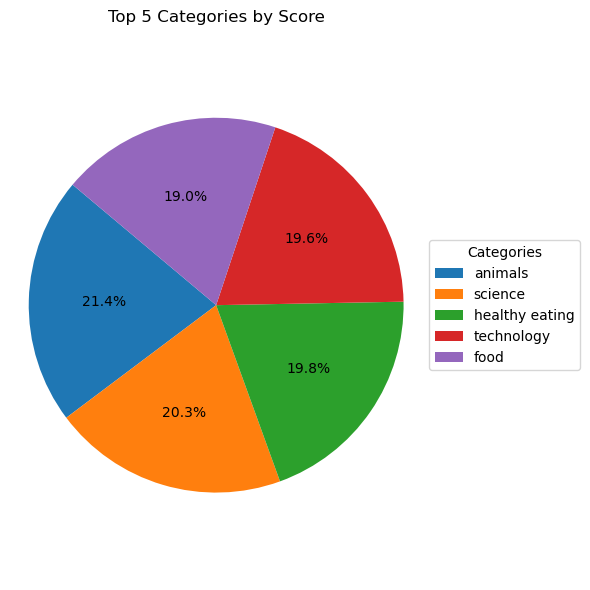

In [15]:
top_5_categories = sorted_score.head(5)
plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(top_5_categories['Score'], labels=['']*len(top_5_categories), autopct='%1.1f%%', startangle=140)
plt.legend(wedges, top_5_categories['Category'], title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Top 5 Categories by Score')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [16]:
final_df['Datetime'] = pd.to_datetime(final_df['Datetime'])
final_df['Year_Month'] = final_df['Datetime'].dt.strftime('%Y-%B')
month_count = final_df['Year_Month'].value_counts()
print("Month with most posts is: ",month_count.idxmax())


Month with most posts is:  2021-May


In [17]:
print("Month with least posts is: ",month_count.idxmin())

Month with least posts is:  2020-June


In [18]:
final_df.head()

,Content ID,RType,Datetime,Type,Category,Sentiment,Score,Year_Month
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,studying,negative,0,2020-November
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,studying,negative,0,2021-January
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-04-09 02:46:20,photo,studying,negative,0,2021-April
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,disgust,2021-03-28 21:15:26,photo,healthy eating,negative,0,2021-March
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,disgust,2020-08-04 05:40:33,photo,healthy eating,negative,0,2020-August


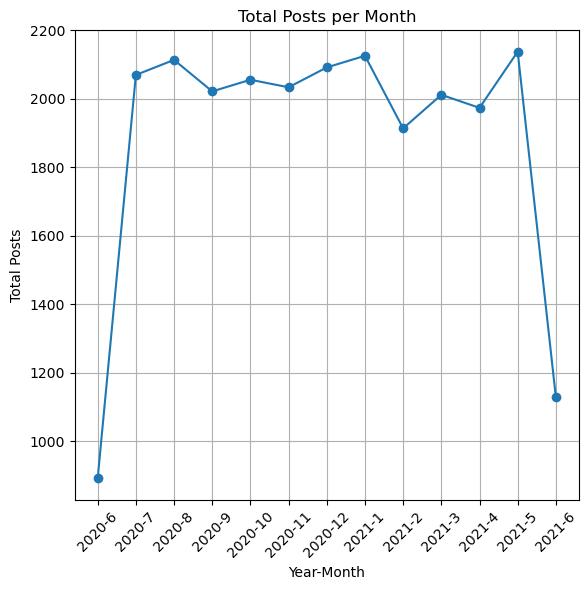

In [19]:
final_df['Year'] = final_df['Datetime'].dt.year
final_df['Month'] = final_df['Datetime'].dt.month
monthly_counts = final_df.groupby(['Year', 'Month']).size().reset_index(name='Total Posts')
monthly_counts_sorted = monthly_counts.sort_values(by=['Year', 'Month'])
plt.figure(figsize=(6,6))
plt.plot(monthly_counts_sorted['Year'].astype(str) + '-' + monthly_counts_sorted['Month'].astype(str), 
         monthly_counts_sorted['Total Posts'], marker='o')
plt.xlabel('Year-Month')
plt.ylabel('Total Posts')
plt.title('Total Posts per Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
